In [1]:
from qiskit import *
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as mplt
import seaborn
import numpy 


# <font color='maroon'>Session I: Introduction</font>

# <font color='maroon'>Quantum Mechanics for Quantum Computing</font>

## <font color='teal'>IBM Q & WITS</font>

### <font color='navy'>September 2019</font> 

Need Logo and Correct Title

# <font color='maroon'>WTF: What The Fuss <font>
* **What** is Quantum Computing?
* **Why** are Quantum Computers seen as ***powerful***?
* To **whom** are Quantum Computers beneficial?
* **How** do Quantum Computers differ from classical computers?
* **When** will Quantum Computers have zero fault tolerance?


In [2]:
from IPython.display import Video
Video("QC_intro_ted.mp4")


##  <font color='maroon'>Qubits</font>

* The basic unit of quantum information.
* Representation:
    * Bloch Sphere.
    * Bra-Ket notation.
* Properties:
    * Heisenburg's Principle.
    * Superposition. 
    * Entanglement.
    * Interference. 

###  <font color='Teal'>Qubits vs Bits</font>


<img src="quibit_bit1.jpg">



Discuss with this analogy

<img src="qubit_bit.jpg">


###  <font color='Teal'>Qubits</font>

#### <font color='Navy'>Representation</font>

**Bloch Sphere**

The `amount of of the zero state and the one state` we have are both complex numbers. They have real and imaginary parts. Two numbers with two degrees of freedom means 4 degrees of freedom. 

However, because the squares of these numbers must add up to one, we lose a degree of freedom, and can cram this 4D number into 3D space and draw it as points on the surface of a sphere. 



In [3]:
qc = QuantumCircuit(1)


In [4]:
# z measurement of qubit 0
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0);

# x measurement of qubit 0
measure_x = QuantumCircuit(1,1)
measure_x.h(0)
measure_x.measure(0,0)

# y measurement of qubit 0
measure_y = QuantumCircuit(1,1)
measure_y.sdg(0)
measure_y.h(0)
measure_y.measure(0,0);

In [5]:
shots = 2**14 # number of samples used for statistics

bloch_vector = []
for measure_circuit in [measure_x, measure_y, measure_z]:
    
    # run the circuit with a the selected measurement and get the number of samples that output each bit value
    counts = execute(qc+measure_circuit,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {}
    for output in ['0','1']:
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    bloch_vector.append( probs['0'] -  probs['1'] )

In [6]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: right;
    vertical-align: middle;
}
</style>
""")


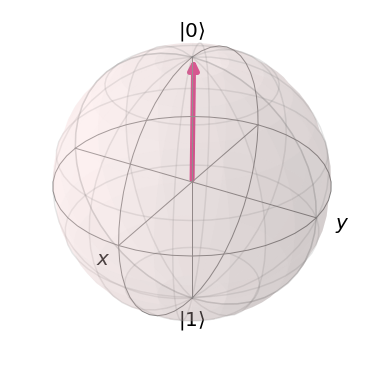

In [7]:
plot_bloch_vector(bloch_vector)

**Bloch Spehre & Bra-Ket Notation**
<img src="bloch_sphere.png">
* Mathematical formalisation.
* Ket: $|a\rangle$ is a vector.
* Bra: $\langle a|$ is the complex conjugate of the Ket.
* State $|0\rangle$ = $\begin{bmatrix}
           1 \\
           0
         \end{bmatrix}$ and $|1\rangle$ = $\begin{bmatrix}
           0 \\
           1
         \end{bmatrix}$


##### <font color='Purple'>Heisenburg Uncertainty Principle</font>
* Can never simultaneously know the following for an object:
    * Exact position. 
    * Exact speed.  

##### <font color='Purple'>Superposition</font>
* **Definition:** Superposition refers to a `combination of states` we would ordinarily independently describe.
* **Bra-Ket Notation:** $|\phi\rangle = \alpha |0\rangle + \beta |1\rangle$.
* **Gate:** Hadamard $H = \dfrac{1}{\sqrt{2}}\begin{bmatrix}
           1 & 1 \\
           1 & -1
         \end{bmatrix}$.
<img src="q-propfig1.svg">

##### <font color='Purple'>Entanglement</font>
* **Definition:** Entanglement is a famously counter-intuitive quantum phenomenon describing behavior we never see in the classical world. Entangled particles `behave together as a system` in ways that cannot be explained using classical logic.
* **Requirement:** At least two quibits. 
* **Gate:** Controlled / Conditional NOT $CNOT $
<img src="q-propfig2.svg">

##### <font color='Purple'>Entanglement</font>
* **Definition:** Entanglement is a famously counter-intuitive quantum phenomenon describing behavior we never see in the classical world. Entangled particles `behave together as a system` in ways that cannot be explained using classical logic.
* **Requirement:** At least two quibits. 
* **Gate:** Controlled / Conditional NOT $CNOT = \begin{bmatrix}
           1 & 0 & 0 & 0 \\
           0 & 1 & 0 & 0 \\
           0 & 0 & 0 & 1 \\
           1 & 0 & 0 & 0
         \end{bmatrix}$.
<img src="q-propfig2.svg">

##### <font color='Purple'>Interferance</font>
* **Definition**: Quantum states can undergo interference due to a phenomenon known as phase. Quantum interference can be understood similarly to wave interference; when two waves are in phase, their amplitudes add, and when they are out of phase, their amplitudes cancel.


<img src="q-propfig3.svg">

### <font color='Teal'>Operations and Bra-Ket Notation</font>

$|STATE\rangle = \alpha|0\rangle + \beta|1\rangle $

**Probabilities**
* NOTE: $|\alpha|^2+|\beta|^2 = 1$

**0 and 1 Basis** 
* $|\phi\rangle = \dfrac{1}{\sqrt{2}}|0\rangle + \dfrac{1}{\sqrt{2}}|1\rangle $
* $|\psi\rangle = \dfrac{1}{\sqrt{2}}|1\rangle - \dfrac{1}{\sqrt{2}}|0\rangle $

**Hadamard Basis** 
* $|+\rangle = \dfrac{1}{\sqrt{2}}|0\rangle + \dfrac{1}{\sqrt{2}}|1\rangle $
* $|-\rangle = \dfrac{1}{\sqrt{2}}|0\rangle - \dfrac{1}{\sqrt{2}}|1\rangle $

DO examples on board

##  <font color='maroon'>Basic Theory</font>

* Vector Spaces
* Inner Product
* Hillbert Spaces
* Unitary Operators
* Matricies and Tensors
* Bra-ket notation 

Fill in From: 
https://cds.cern.ch/record/1522001/files/978-1-4614-6336-8_BookBackMatter.pdf


http://karin.fq.uh.cu/qct/MMN/extras/Bra-ket_notation-Wiki.pdf

https://ocw.mit.edu/courses/physics/8-05-quantum-physics-ii-fall-2013/lecture-notes/MIT8_05F13_Chap_04.pdf

##  <font color='Teal'>Quantum Logic Gates</font>


Discuss, images
* https://towardsdatascience.com/demystifying-quantum-gates-one-qubit-at-a-time-54404ed80640
* https://towardsdatascience.com/building-your-own-quantum-circuits-in-python-e9031b548fa7
* https://pdfs.semanticscholar.org/a83c/70da5e7068ff6c878d021ef0b70611d7d545.pdf
* http://vlsicad.eecs.umich.edu/BK/Slots/cache/www.eecs.umich.edu/~jhayes/JPH_DACslides_Jun03.pdf
* https://www.quantiki.org/wiki/quantum-gates


###  <font color='Navy'>Logic Gates Operations</font>



###  <font color='Navy'>Setting Up Logic Gates</font>


#  <font color='maroon'>Quantum Applications</font>

* https://youtu.be/JhHMJCUmq28
* https://medium.com/@jackkrupansky/what-applications-are-suitable-for-a-quantum-computer-5584ef62c38a


